K-L Divergence Lab 
------

There is a Random Variable with two states:
X ={🍭, 🍣}

There are two different distributions over those states:

p(🍭) = 1-r  
p(🍣) = r   

q(🍭) = 1-s  
q(🍣) = s

Solve the following by hand or write code.

1) What is D(p||q) when r = 1/2 and s = 1/4?

In [1]:
from numpy import log2

In [7]:
def kl_divergence(p,q):
    # return the sum from the list of probabilities for p and q
    return (sum([p_i*log2(p_i/q_i) for p_i,q_i in zip(p,q)]))

In [8]:
kl_divergence([.5,.5],[.75,.25])

0.20751874963942185

2) What is __D(q||p)__ when r = 1/2 and s = 1/4?

In [9]:
kl_divergence([.75,.25],[.5,.5])

0.18872187554086717

Given r = 1/2 and s = 1/4, are  D(p||q) and  D(q||p) the same? Why or Why not?

In [10]:
#D(p||q) and D(q||p)  are NOT the same. This is because you are comparing the baseline to the evdienece versus 
# evidence to the baseline model

3) What is D(p||q) when r = 1/8 and __s = 7/8__?

In [14]:
kl_divergence([1/8,7/8],[7/8,1/8])

2.1055161915432028

4) What is __D(q||p)__ when r = 1/8 and __s = 7/8__?

In [15]:
kl_divergence([7/8,1/8],[1/8,7/8])

2.1055161915432028

Given r = 1/8 and s = 7/8, now are D(p||q) and  D(q||p) the same? Why or Why not?

In [ ]:
# Here the KL divergence IS the same between D(p||q) and D(q||p) 
# the KL divergence is symmetric when P(x) + Q(x) = 1 

What is the generalized relationship between the values of p and q that would make computed K-L Divergence symmetric?

In [27]:
# the KL divergence is symmetric when P(x) + Q(x) = 1 

In [21]:
log2((1/8)/(7/8))*1/8

-0.35091936525720052

-------
Create and compare Gaussians with K-L Divergence
------

In [28]:
import matplotlib.pyplot as pl
import numpy as np
import seaborn

%matplotlib inline

In [29]:
def pdf(x,p):
    "Calculate the gaussian probability density at x"
    return np.exp(-(x-p[mean])**2/(2*p[std]**2))/(np.sqrt(2*np.pi*p[std]))

# Helper variables
mean = "mean"
std  = "std" 

__TODO__: Write a function to find the relative entropy between two univariate gaussians

In [117]:
import scipy.stats as stats
from scipy.stats import norm


In [ ]:
norm()

In [92]:
stats.norm(0,.31).pdf(-5)

4.1651569505580049e-57

In [93]:
log2(1)

0.0

In [197]:
def gaussian_re(p,q):
    "Calculate the relative entropy between two univariate gaussians"
    #https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
    return log2(q['std']/p['std']) + (p['std']**2 + (p['mean'] - q['mean'])**2)/(2*q['std']**2) -1/2
    


Double check for same distributions
------


In [198]:
p = {mean : 0, 
    std : 0.31}

q = p.copy() # A separate copy of parameters

In [199]:
p

{'mean': 0, 'std': 0.31}

In [200]:
print('R(p|q) =', gaussian_re(p,q))

R(p|q) = 0.0


In [201]:
# Test that K-L Divergence is zero when comparing indentical distributions
assert gaussian_re(p,q) == 0

Plot distributions

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

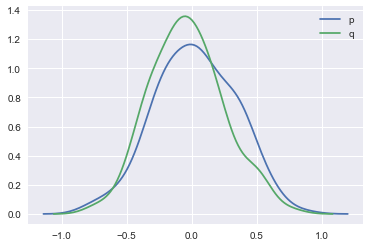

In [203]:
x = np.linspace(-3,3);
sns.kdeplot(np.array([stats.norm(p['mean'],p['std']).rvs() for i in range(-100,100)]),label='p')
sns.kdeplot(np.array([stats.norm(q['mean'],q['std']).rvs() for i in range(-100,100)]),label='q')
plt.legend()
# TODO: Write plotting code. Make it look nice with Seaborn

In [204]:
p = {mean : 1, 
     std : .5}

q = {mean : 3, 
     std : .5}

In [205]:
print('R(q|p)=', gaussian_re(p,q))

R(q|p)= 8.0


In [206]:
assert gaussian_re(p,q) == 8

Plot distributions

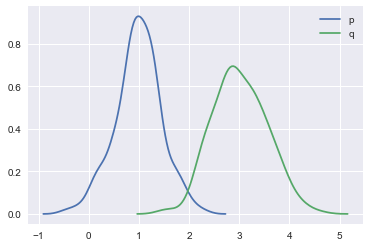

In [207]:
x = np.linspace(-5, 10);
sns.kdeplot(np.array([stats.norm(p['mean'],p['std']).rvs() for i in range(-100,100)]),label='p')
sns.kdeplot(np.array([stats.norm(q['mean'],q['std']).rvs() for i in range(-100,100)]),label='q')
# TODO: Write plotting code. Make it look nice with Seaborn

Change the q distribution (without setting it equal to p) to reduce relative entropy.

In [215]:
p = {mean : 1, 
     std : .5}

q = {mean : 2.5, 
     std : .9}

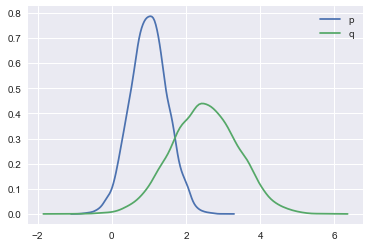

In [218]:
x = np.linspace(-5, 10);
sns.kdeplot(np.array([stats.norm(p['mean'],p['std']).rvs() for i in range(10000)]),label='p')
sns.kdeplot(np.array([stats.norm(q['mean'],q['std']).rvs() for i in range(10000)]),label='q')
# TODO: Write plotting code. Make it look nice with Seaborn

In [217]:
print('R(q|p)=', gaussian_re(p,q))

R(q|p)= 1.8912067831


----
Challenge Activities
-----

![](images/challenge_1.png)

Source: Elements of Information Theory

<br>
-----